# Природа и причины задержек рейсов
## В этом отчете мы планируем проанализировать задержки рейсов,чтобы выявить их характер и особенности. Определив проблемные области, мы можем внести свой вклад в обоснованное принятие решений в Министерстве транспорта. 

In [2]:
import pandas as pd
df = pd.read_csv('flights.csv', low_memory=False)
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

# 1)Еженедельная вариация задержек
## Чтобы понять еженедельную вариацию задержек, давайте построим среднюю задержку отправления для разных дней недели.

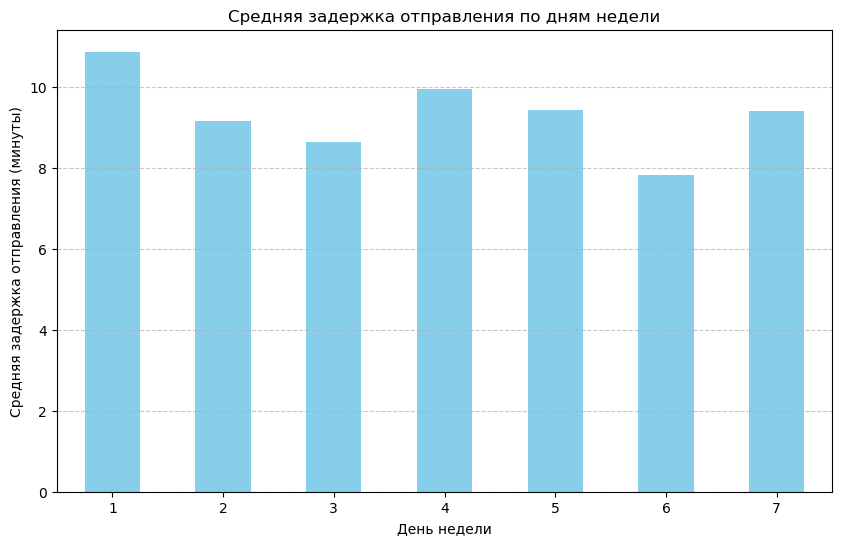

In [4]:
import matplotlib.pyplot as plt

avg_delay_per_day = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
plt.figure(figsize=(10, 6))
avg_delay_per_day.plot(kind='bar', color='skyblue')
plt.title('Средняя задержка отправления по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя задержка отправления (минуты)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Вывод: Наибольшую среднюю задержку мы можем наблюдать в понедельник,ибо аэропорты не справляются с неравномерной загрузкой после выходных дней.

# 2)Ежемесячная вариация задержек
## Чтобы понять ежемесячную вариацию задержек, давайте построим среднюю задержку отправления для разных месяцев.

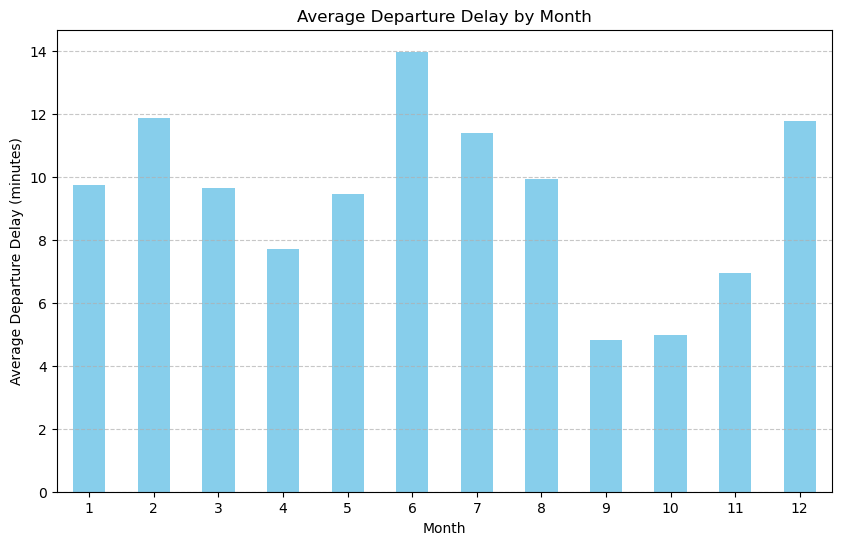

In [5]:
average_delay_per_month = df.groupby('MONTH')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(10, 6))
average_delay_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Вывод: Средняя задержка отправления рейсов в июне составила наибольшее значение по сравнению с другими месяцами. Это может быть связано с увеличенный объем пассажиров ввиду отпусков 

# 3)Производительность авиакомпаний
## Рассмотрим производительность различных авиакомпаний с точки зрения задержек отправления.

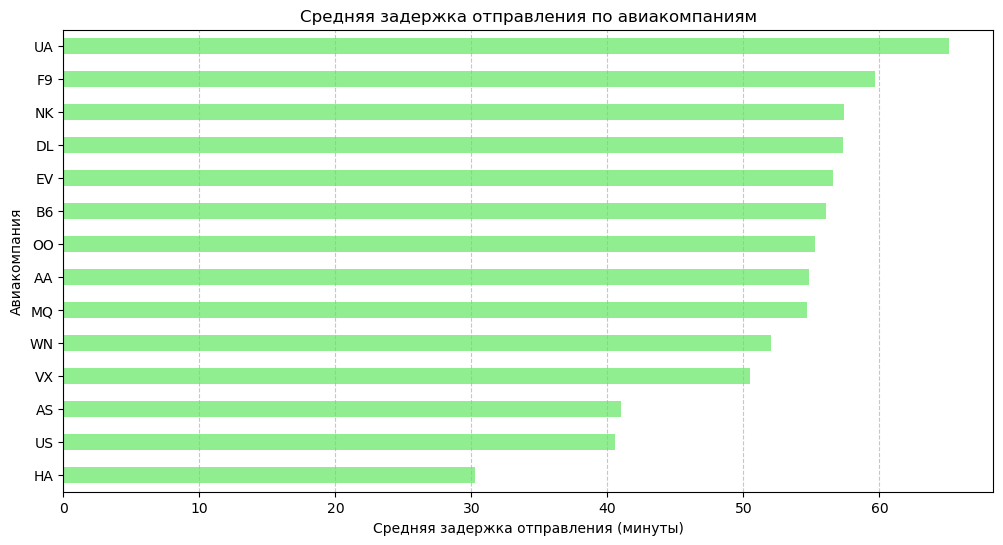

In [19]:
avg_delay_per_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean()
plt.figure(figsize=(12, 6))
avg_delay_per_airline.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Средняя задержка отправления по авиакомпаниям')
plt.xlabel('Средняя задержка отправления (минуты)')
plt.ylabel('Авиакомпания')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Вывод(локальный):Наибольшую среднюю задержку можем наблюдать у компаний  NK,UA,F9 и B6.
## Чтобы оценить произодительность каждой из компаний,можно построить график зависимости частоты полета компаний от их средних задержек.Для большей наглядности изобразим линейную аппроксимацию полученных значений.

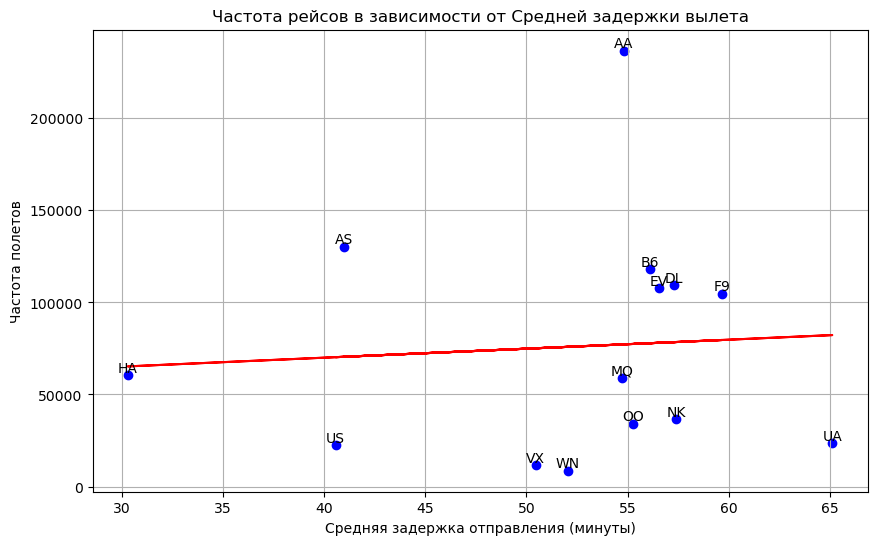

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

selected_airlines = ['NK', 'UA', 'F9', 'B6', 'WN', 'MQ', 'VX', 'AA', 'EV', 'OO', 'DL', 'US', 'AS', 'HA']
selected_data = df[df['AIRLINE'].isin(selected_airlines)]

average_delays = selected_data.groupby('AIRLINE')['DEPARTURE_DELAY'].mean()

flight_counts = selected_data['AIRLINE'].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(average_delays, flight_counts, color='blue')

model = LinearRegression()
X = average_delays.values.reshape(-1, 1)
y = flight_counts.values.reshape(-1, 1)
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(average_delays, y_pred, color='red')

for airline, x, y in zip(average_delays.index, average_delays, flight_counts):
    plt.text(x, y, airline, ha='center', va='bottom')

plt.title('Частота рейсов в зависимости от Средней задержки вылета')
plt.xlabel('Средняя задержка отправления (минуты)')
plt.ylabel('Частота полетов')
plt.grid(True)
plt.show()


## Вывод: Интересно, что компания AA, несмотря на высокую частоту полетов, демонстрирует сравнительно небольшую задержку отправления. Это может быть связано с эффективным управлением временем и ресурсами компанией, а также с оптимизацией процессов обслуживания рейсов,чего не скажешь о компаниях UA и NK

# 4)Влияние погоды на среднюю задержку

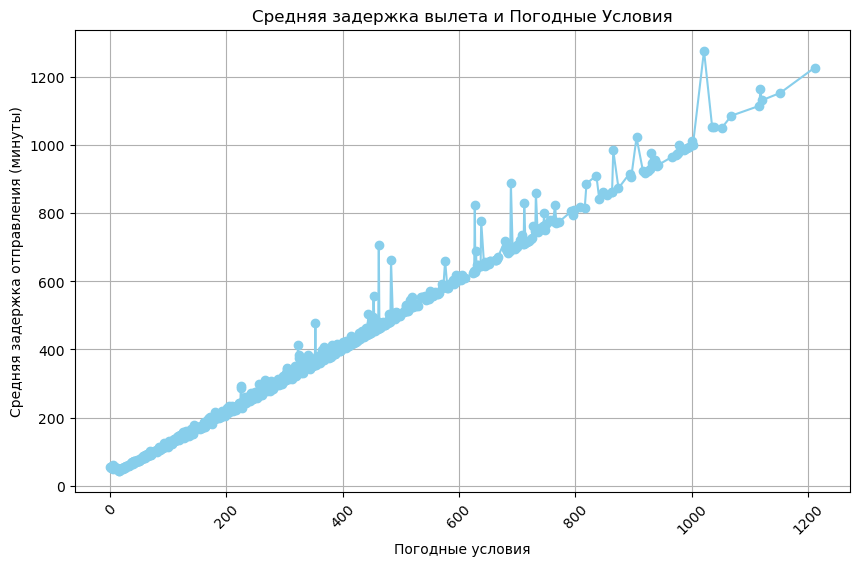

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df.dropna(subset=['WEATHER_DELAY'], inplace=True)

avg_delay_by_weather = df.groupby('WEATHER_DELAY')['DEPARTURE_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(avg_delay_by_weather['WEATHER_DELAY'], avg_delay_by_weather['DEPARTURE_DELAY'], marker='o', color='skyblue')
plt.title('Средняя задержка вылета и Погодные Условия')
plt.xlabel('Погодные условия')
plt.ylabel('Средняя задержка отправления (минуты)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## Вывод: Исходя из построенного графика зависимости средней задержки отправления от типа погоды, можно сделать вывод о том, что наблюдается почти линейная зависимость.Это указывает на то, что изменение типа погоды сопровождается пропорциональным изменением средней задержки отправления.

# 5)Корреляция между задержками отправления и прибытия
## Давайте исследуем, коррелируют ли задержки отправления с задержками прибытия

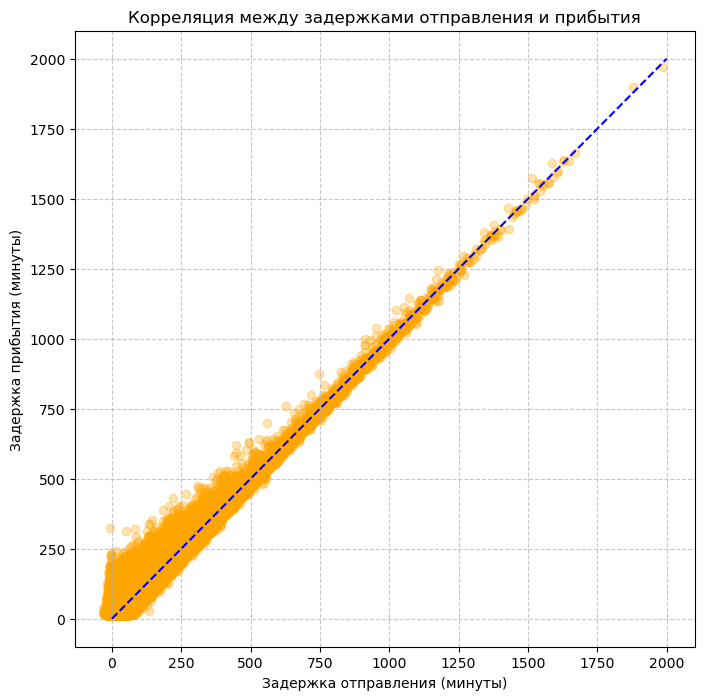

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df['DEPARTURE_DELAY'], df['ARRIVAL_DELAY'], alpha=0.3, color='orange')
plt.plot([0, 2000], [0, 2000], linestyle='--', color='blue')  # Добавление прямой y = x
plt.title('Корреляция между задержками отправления и прибытия')
plt.xlabel('Задержка отправления (минуты)')
plt.ylabel('Задержка прибытия (минуты)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Вывод: График показывает, что при более длительных задержках отправления, скорее всего, произойдут такие же длительные задержки прибытия.

# Заключение
## Через визуальный анализ задержек рейсов мы выявили различные закономерности и потенциальные проблемные области. Решение этих проблем, таких как операционные неэффективности, производительность авиакомпаний и погодные помехи, может значительно улучшить общую надежность и эффективность воздушных перевозок. Полученные из отчета идеи могут помочь Министерству транспорта принимать обоснованные решения для смягчения задержек и улучшения опыта пассажиров.